In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

The underlying asset with price $S$ follows geometric Brownian motion. The price is over time $t$ with a stochastic variable $W$ for Brownian motion, with the behavior being defined by the following stochastic differential equation.
$$\dfrac{dS}{S} = \mu dt + \sigma dW$$

In [81]:
# generate geometric Brownian motion sequence
def rand_walk_cont(n, mu=0, sigma=1, init=1, dt=0.01):
    sims = [init]
    # loop through n iterations
    for _ in range(n):
        sims.append(sims[-1] * np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt))))
    return sims

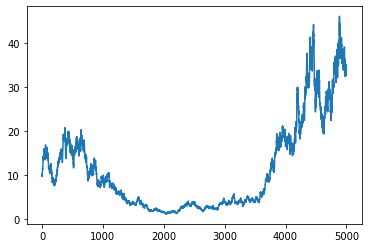

In [82]:
plt.plot(rand_walk_cont(n=5000, init=10, mu=1, sigma=1, dt=0.001))

Stochastic calculus is much more difficult to work with. Propose a discretization by the following. Want a random varible $X$ such that it has $-x, 0, x$ with equal probability and standard deviation $\sigma$. Standard deviation is $\sigma = \sqrt{\frac{1}{3}(-x)^2 + \frac{1}{3}(0)^2 + \frac{1}{3}(x)^2} = \sqrt{\dfrac{2}{3}}x$ so $x = \sqrt{3/2}\sigma$.

In [97]:
def discrete_sample(sigma):
    x = np.sqrt(3 / 2) * sigma
    return np.random.permutation([-1, 0, 1])[0] * x

In [98]:
# generate discrete approximation of geometric Brownian motion sequence
def rand_walk_disc(n, mu=0, sigma=1, init=1, dt=0.01):
    sims = [init]
    # loop through n iterations
    for _ in range(n):
        sims.append(sims[-1] * np.exp((mu - sigma ** 2 / 2) * dt + sigma * discrete_sample(np.sqrt(dt))))
    return sims

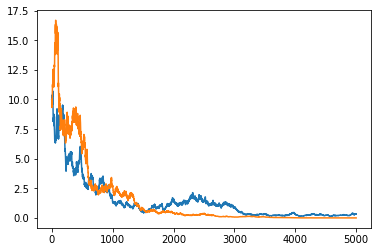

In [115]:
plt.plot(rand_walk_disc(n=5000, init=10, mu=0, sigma=1, dt=0.001))
plt.plot(rand_walk_cont(n=5000, init=10, mu=0, sigma=1, dt=0.001))

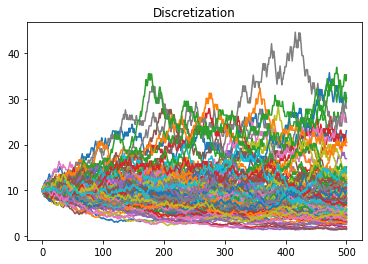

In [121]:
for _ in range(100):
    plt.plot(rand_walk_disc(n=500, init=10, mu=0, sigma=1, dt=0.001))
plt.title('Discretization')
plt.show()

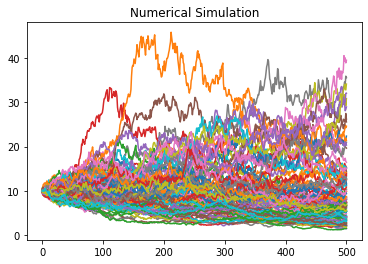

In [120]:
for _ in range(100):
    plt.plot(rand_walk_cont(n=500, init=10, mu=0, sigma=1, dt=0.001))
plt.title('Numerical Simulation')
plt.show()

## Black-Scholes Formula

The famed Black-Scholes formula, which is the analytical solution here, will be implemented below.

In [4]:
## implementation of Black-Scholes formula for European options (analytical solution)
def blackscholes_formula(sigma, time_remaining, S, K, r, optiontype):
    # intermediate calculations
    d1 = (1 / sigma * np.sqrt(time_remaining)) * (np.log(S / K) + (r + sigma ** 2 / 2) * time_remaining)
    d2 = d1 - sigma * time_remaining
    PV = K * np.exp(-r * time_remaining)
    
    if optiontype == 'call':
        return norm.cdf(d1) * S - norm.cdf(d2) * PV
    if optiontype == 'put':
        return norm.cdf(-d2) * PV - norm.cdf(-d1) * S

In [5]:
sigma = 0.5
time_remaining = 1
K = 1
r = 0
calls = [blackscholes_formula(sigma, time_remaining, S, K, r, 'call') for S in np.array(range(100)) / 50]

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


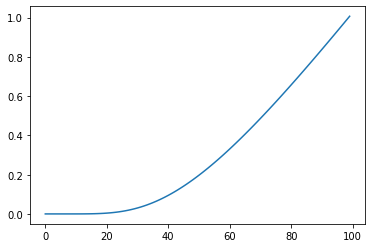

In [6]:
plt.plot(calls)

## Numerical Solution